In [1]:
weather = '/home/vant/Escritorio/MasterDataScience/Clases/Python/weather_year.csv'

In [2]:
%%time
!cat {weather} |wc -l

367
CPU times: user 2.5 ms, sys: 4.41 ms, total: 6.91 ms
Wall time: 108 ms


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly as py
%matplotlib inline

In [4]:
pd.options.display.max_columns=None
dfw = pd.read_csv(weather, parse_dates=[0])
dfw.head()

,EDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,Mean Sea Level PressureIn,Min Sea Level PressureIn,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2012-03-10,56,40,24,24,20,16,74,50,26,30.53,30.45,30.34,10,10,10,13,6,17.0,0.00,0,NaN,138
1,2012-03-11,67,49,30,43,31,24,78,53,28,30.37,30.27,30.13,10,10,10,22,7,32.0,T,1,Rain,163
2,2012-03-12,71,62,53,59,55,43,90,76,61,30.13,29.99,29.88,10,10,6,24,14,36.0,0.03,6,Rain,190
3,2012-03-13,76,63,50,57,53,47,93,66,38,30.12,30.06,29.97,10,10,4,16,5,24.0,0.00,0,NaN,242
4,2012-03-14,80,62,44,58,52,43,93,68,42,30.15,30.10,30.04,10,10,10,16,6,22.0,0.00,0,NaN,202


In [5]:
dfw.dtypes #dfw.describe()#dfw.count()#dfw.shape

EDT                           datetime64[ns]
Max TemperatureF                       int64
Mean TemperatureF                      int64
Min TemperatureF                       int64
Max Dew PointF                         int64
MeanDew PointF                         int64
Min DewpointF                          int64
Max Humidity                           int64
 Mean Humidity                         int64
 Min Humidity                          int64
 Max Sea Level PressureIn            float64
 Mean Sea Level PressureIn           float64
 Min Sea Level PressureIn            float64
 Max VisibilityMiles                   int64
 Mean VisibilityMiles                  int64
 Min VisibilityMiles                   int64
 Max Wind SpeedMPH                     int64
 Mean Wind SpeedMPH                    int64
 Max Gust SpeedMPH                   float64
PrecipitationIn                       object
 CloudCover                            int64
 Events                               object
 WindDirDe

In [6]:
dfw.columns = ['Date', 'MaxT', 'MeanT', 'MinT', 'MXDPT', 'MNDPT', 'MIDPT',
              'MaxH', 'MeanH', 'MinH', 'MaxSea', 'MeanSea', 'MinSea', 'MaxVis',
              'MeanVis', 'MinVis', 'MaxWind', 'MeanWind', 'MaxGust', 'Preci',
              'Cloud', 'Events', 'WindDir']

In [7]:
dfw1 = dfw[['Date', 'MeanT', 'MeanH', 'MeanSea', 'MeanWind', 'Preci', 'Events', 'WindDir' ]]

In [8]:
def conver_WindDir(wind):
    if wind in range(0,46):
        return 1
    elif wind in range(46,136):
        return 2
    elif wind in range(136,226):
        return 3
    elif wind in range(226,316):
        return 4
    else:
        return 1
    
conver_WindDir(167)

3

In [9]:
def conver_F(f):
    return (f - 32) / 1.8

conver_F(89)

31.666666666666664

In [10]:
dfw1['MeanC'] = dfw1['MeanT'].apply(conver_F)

/home/vant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [11]:
dfw1['WindCard'] = dfw1['WindDir'].apply(conver_WindDir)

/home/vant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [12]:
dfw1 = dfw1.drop('WindDir', axis=1)
dfw1 = dfw1.drop('MeanT', axis=1)

In [21]:
dfw1.head()

,Date,MeanH,MeanSea,MeanWind,Preci,Events,MeanC,WindCard
0,2012-03-10,50,30.45,6,0.00,NaN,4.444444,3
1,2012-03-11,53,30.27,7,T,Rain,9.444444,3
2,2012-03-12,76,29.99,14,0.03,Rain,16.666667,3
3,2012-03-13,66,30.06,5,0.00,NaN,17.222222,4
4,2012-03-14,68,30.10,6,0.00,NaN,16.666667,3


In [23]:
dfw1['MeanC'].dtype

dtype('float64')

In [27]:
dfw1['MeanC'] = dfw1['MeanC'].astype('int64')

In [28]:
dfw1.head()

,Date,MeanH,MeanSea,MeanWind,Preci,Events,MeanC,WindCard
0,2012-03-10,50,30.45,6,0.00,NaN,4,3
1,2012-03-11,53,30.27,7,T,Rain,9,3
2,2012-03-12,76,29.99,14,0.03,Rain,16,3
3,2012-03-13,66,30.06,5,0.00,NaN,17,4
4,2012-03-14,68,30.10,6,0.00,NaN,16,3


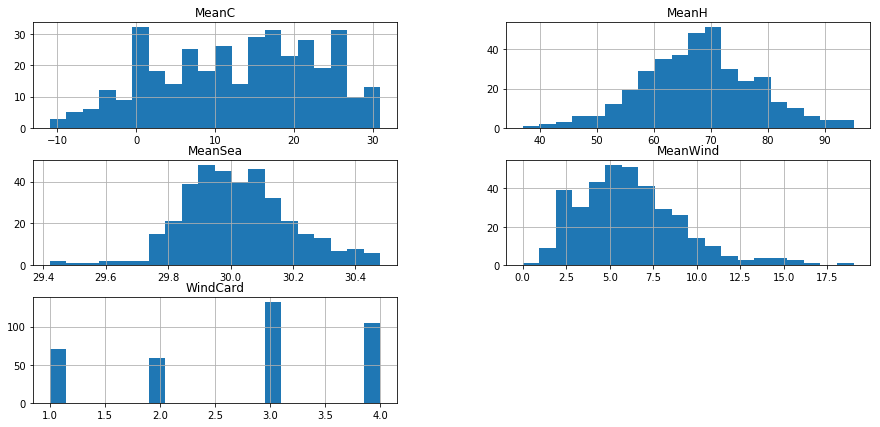

In [29]:
dfw1.hist(figsize=(15,7), bins=20);

In [30]:
dfw2 = dfw1[dfw1['Events'].isin(['Rain'])]
dfw2.head()


,Date,MeanH,MeanSea,MeanWind,Preci,Events,MeanC,WindCard
1,2012-03-11,53,30.27,7,T,Rain,9,3
2,2012-03-12,76,29.99,14,0.03,Rain,16,3
8,2012-03-18,69,30.07,8,T,Rain,21,3
12,2012-03-22,65,30.07,4,0.14,Rain,20,3
19,2012-03-29,55,30.00,6,T,Rain,14,2


In [57]:
dfw2['Preci']= dfw2['Preci'].str.replace('T','0')

/home/vant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [58]:
dfw2.head()

,Date,MeanH,MeanSea,MeanWind,Preci,Events,MeanC,WindCard
1,2012-03-11,53,30.27,7,0,Rain,9,3
2,2012-03-12,76,29.99,14,0.03,Rain,16,3
8,2012-03-18,69,30.07,8,0,Rain,21,3
12,2012-03-22,65,30.07,4,0.14,Rain,20,3
19,2012-03-29,55,30.00,6,0,Rain,14,2


In [61]:
dfw2['Preci'] = dfw2['Preci'].astype('float64')

/home/vant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [62]:
dfw2.head()

,Date,MeanH,MeanSea,MeanWind,Preci,Events,MeanC,WindCard
1,2012-03-11,53,30.27,7,0.00,Rain,9,3
2,2012-03-12,76,29.99,14,0.03,Rain,16,3
8,2012-03-18,69,30.07,8,0.00,Rain,21,3
12,2012-03-22,65,30.07,4,0.14,Rain,20,3
19,2012-03-29,55,30.00,6,0.00,Rain,14,2


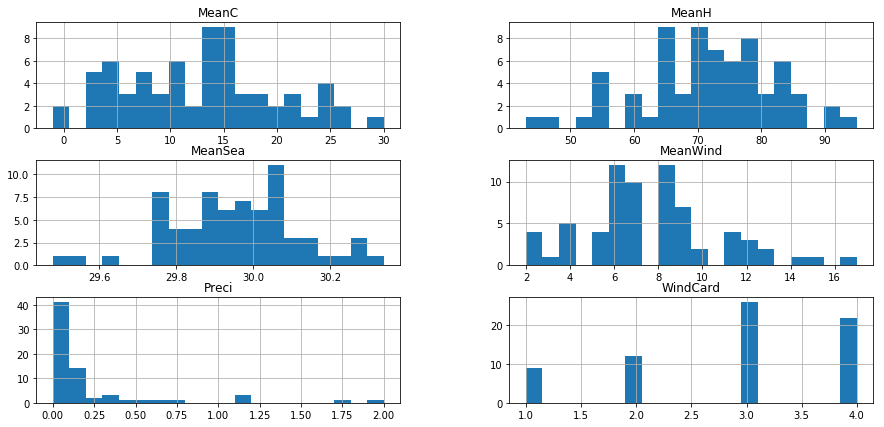

In [63]:
dfw2.hist(figsize=(15,7), bins=20);

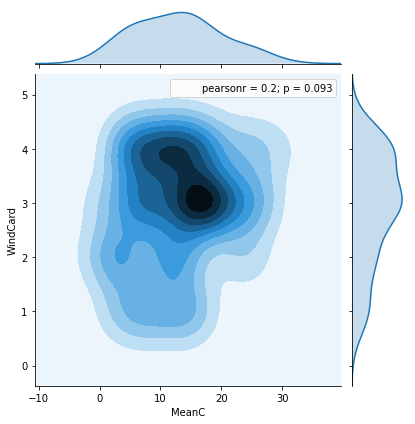

In [64]:
import seaborn as sns

sns.jointplot(data=dfw2, x='MeanC', y='WindCard', kind='kde');

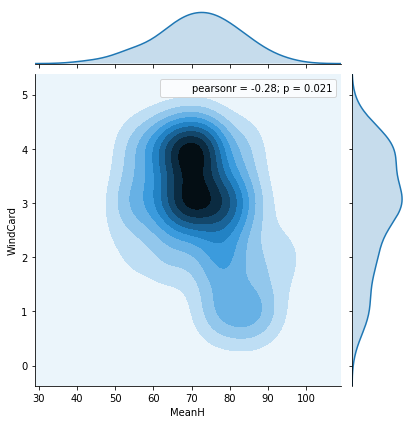

In [65]:
sns.jointplot(data=dfw2, x='MeanH', y='WindCard', kind='kde');

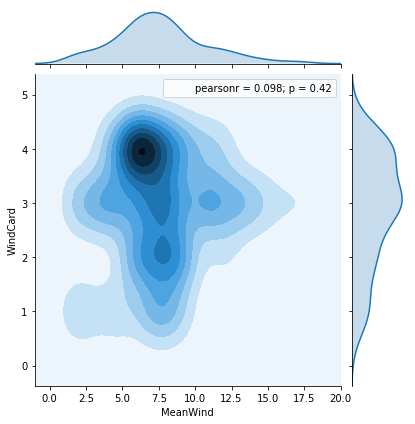

In [66]:
sns.jointplot(data=dfw2, x='MeanWind', y='WindCard', kind='kde');

In [91]:
dfw3 = dfw2[dfw2['WindCard'] >= 3] #dias de lluvia con vientos de sur y este (mayoria de dias del año)
dfw3.head()

,Date,MeanH,MeanSea,MeanWind,Preci,Events,MeanC,WindCard
1,2012-03-11,53,30.27,7,0.00,Rain,9,3
2,2012-03-12,76,29.99,14,0.03,Rain,16,3
8,2012-03-18,69,30.07,8,0.00,Rain,21,3
12,2012-03-22,65,30.07,4,0.14,Rain,20,3
37,2012-04-16,75,29.94,12,0.38,Rain,16,4


In [90]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.offline as offline

plotly.offline.init_notebook_mode(connected=True)


trace1 = {"x": dfw3['Date'], 
          "y": dfw3['MeanC'], 
          "marker": {"color": "red", "size": 12}, 
          "mode": "markers", 
          "name": "MeanC", 
          "type": "scatter"
}

trace2 = {"x": dfw3['Date'], 
          "y": dfw3['MeanH'], 
          "marker": {"color": "blue", "size": 12}, 
          "mode": "markers", 
          "name": "MeanH", 
          "type": "scatter", 
}

data = [trace1, trace2]
layout = {"title": "Raining at San Francisco", 
          "xaxis": {"title": "Days", }, 
          "yaxis": {"title": "MeanVariable"}}

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='basicplotly_try1')

In [ ]:
#Siguiente objetivo aplicar modelos de regresion lineal para estimar temperatura media y humedad media en dias 
#de lluvia con viento sur y este segun epoca del año